In [129]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

In [130]:
df = pd.read_csv('Glassdoor_Job_Postings.csv')
df

,company,job_title,company_rating,job_description,location,salary_avg_estimate,salary_estimate_payperiod,company_size,company_founded,employment_type,industry,sector,revenue,career_opportunities_rating,comp_and_benefits_rating,culture_and_values_rating,senior_management_rating,work_life_balance_rating
0,ABB,Junior Data Analyst,4.0,Junior Data Analyst\nTake your next career ste...,Bengaluru,"₹3,25,236",/yr (est.),10000+ Employees,1883,Company - Public,Electronics Manufacturing,Manufacturing,$10+ billion (USD),3.7,3.6,4.0,3.5,3.9
1,Philips,Data Scientist - AI/ML,4.0,Job Title\nData Scientist - AI/ML\nJob Descrip...,Bengaluru,NaN,NaN,10000+ Employees,1891,Company - Public,Healthcare Services & Hospitals,Healthcare,$10+ billion (USD),3.8,3.7,4.0,3.5,4.0
2,HSBC,Data Science GSC’s,3.9,Job description\nGraduate/ Post-graduate degre...,Bengaluru,NaN,NaN,10000+ Employees,1865,Company - Public,Banking & Lending,Finance,$10+ billion (USD),3.6,3.6,3.8,3.4,3.7
3,Facctum Solutions,Data Analyst,NaN,Job Description\nExperience: 0 - 2 years in da...,Karnataka,NaN,NaN,1 to 50 Employees,--,Company - Private,--,--,Unknown / Non-Applicable,NaN,NaN,NaN,NaN,NaN
4,JPMorgan Chase & Co,Data and Analytics - Associate,4.0,JOB DESCRIPTION\n\nYou are a strategic thinker...,India,NaN,NaN,10000+ Employees,1799,Company - Public,Banking & Lending,Finance,$10+ billion (USD),4.0,3.9,3.9,3.6,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Kpro Solutions,Analytics & Data Science,4.0,Experience & Qualification:\n\nMinimum of 9 ye...,Bengaluru,"₹4,83,915",/yr (est.),1 to 50 Employees,--,Company - Private,--,--,Unknown / Non-Applicable,4.0,4.0,4.0,4.0,4.0
896,Athena Global Technologies,Data Engineer,NaN,Immediate requirement for Data Engineer\nExper...,Hyderābād,"₹6,78,949",/yr (est.),51 to 200 Employees,--,Company - Private,--,--,Unknown / Non-Applicable,4.2,3.5,4.0,3.9,3.9
897,Wesco,India-Bangalore: Data Engineer,3.7,This person will work independently or with a ...,Bengaluru,"₹6,51,920",/yr (est.),10000+ Employees,1922,Company - Public,Wholesale,Retail & Wholesale,$10+ billion (USD),3.5,3.4,3.6,3.3,3.8
898,Course5,Data Scientist,4.2,If you meet our position requirements and can ...,Bengaluru,"₹4,24,426",/yr (est.),1001 to 5000 Employees,2000,Company - Private,Business Consulting,Management & Consulting,$100 to $500 million (USD),4.3,4.1,4.3,4.1,4.2


In [131]:
# Nettoyage des données valeurs inutile, valeur manquante, stem lem et stop word
df.shape

(900, 18)

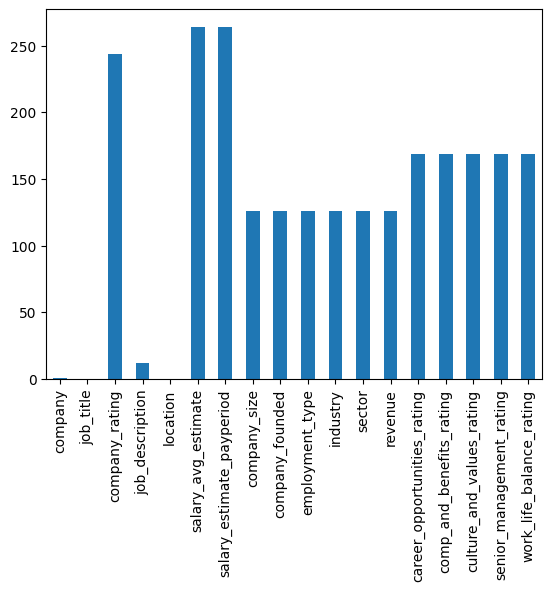

In [132]:
# Nombre de données null par collone
df.isnull().sum().plot(kind='bar')
plt.show()

In [133]:
# Nombre de données dupliquées
df.duplicated().sum()

5

In [134]:
selected_columns = ['company', 'sector', 'location', 'job_description']
df_selected = df[selected_columns]
print(df_selected)

                        company                   sector   location  \
0                           ABB            Manufacturing  Bengaluru   
1                       Philips               Healthcare  Bengaluru   
2                          HSBC                  Finance  Bengaluru   
3             Facctum Solutions                       --  Karnataka   
4           JPMorgan Chase & Co                  Finance      India   
..                          ...                      ...        ...   
895              Kpro Solutions                       --  Bengaluru   
896  Athena Global Technologies                       --  Hyderābād   
897                       Wesco       Retail & Wholesale  Bengaluru   
898                     Course5  Management & Consulting  Bengaluru   
899                  Sanfoundry                Education  Hyderābād   

                                       job_description  
0    Junior Data Analyst\nTake your next career ste...  
1    Job Title\nData Scientist - 

In [135]:
# Montre le nombre, l'unique le top et la fréquence de chacune des colonnes qui nous intérresse
print(df_selected.describe())

                    company                  sector   location  \
count                   899                     774        900   
unique                  686                      23         47   
top     JPMorgan Chase & Co  Information Technology  Bengaluru   
freq                     28                     295        305   

                                          job_description  
count                                                 888  
unique                                                881  
top     Job Summary :\nOur corporate activities are gr...  
freq                                                    3  


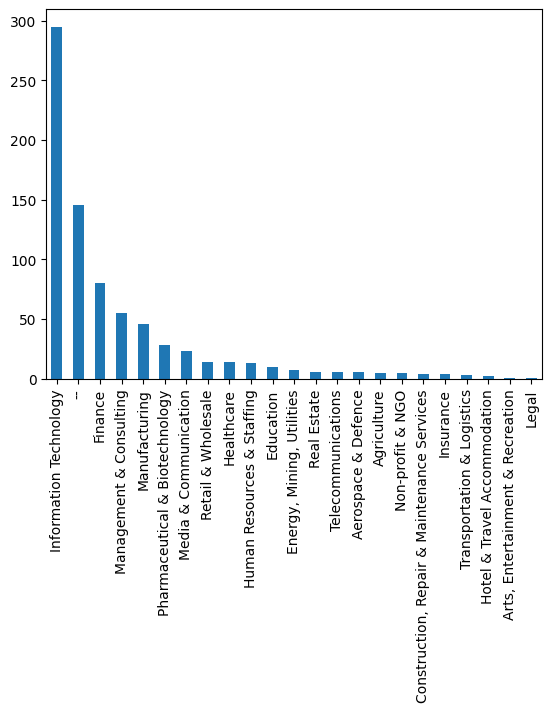

In [136]:
df_selected['sector'].value_counts().plot(kind='bar')
plt.show()

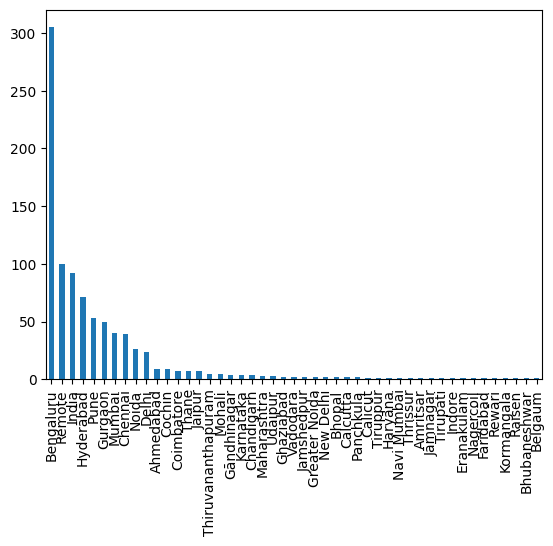

In [137]:
df_selected['location'].value_counts().plot(kind='bar')
plt.show()

C:\Users\grego\AppData\Local\Temp\ipykernel_21920\2984677909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['job_description'] = df_selected['job_description'].astype(str)
C:\Users\grego\AppData\Local\Temp\ipykernel_21920\2984677909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['length'] = df_selected['job_description'].apply(len)


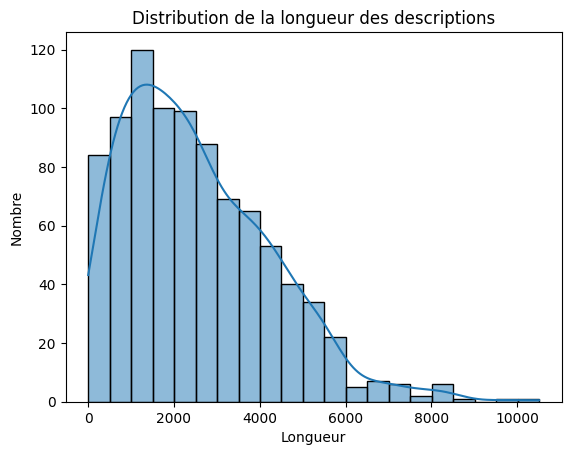

In [138]:
df_selected['job_description'] = df_selected['job_description'].astype(str)
df_selected['length'] = df_selected['job_description'].apply(len)
sns.histplot(df_selected['length'], kde=True)
plt.title('Distribution de la longueur des descriptions')
plt.xlabel('Longueur')
plt.ylabel('Nombre')
plt.show()

In [139]:
# Différence de demande en datascience entre les secteurs de l'informatique et de la finance
countSectorInformatique = (df_selected['sector'] == 'Information Technology').sum()
countSectorFinance = (df_selected['sector'] == 'Finance').sum()

print(countSectorInformatique)
print(countSectorFinance)

295
80
